# Dimensionality Reduction using the digits image dataset from sklearn module

Dimensionality reduction on the digits dataset involves reducing the number of features in the dataset (which are pixel intensities of handwritten digit images) while preserving the structure and information necessary to distinguish between different digits.

The digits dataset is a popular built-in dataset in scikit-learn that contains 1797 grayscale images of handwritten digits from 0 to 9. Each image is 8x8 pixels in size, resulting in 64 features when flattened into a vector. The pixel values range from 0 to 16, representing grayscale intensity levels.

The dataset is well-balanced, with roughly equal numbers of samples for each digit class. It comes preprocessed and normalized, making it ready for immediate use in machine learning applications. While smaller and simpler than the more extensive MNIST dataset, the digits dataset maintains enough complexity to effectively demonstrate various machine learning concepts.


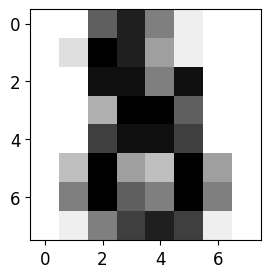

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from time import time
import numpy as np

# Load the digits dataset
digits = datasets.load_digits()

# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

# Randomized PCA

Randomized PCA is a faster variant of Principal Component Analysis that uses randomized algorithms to compute approximate principal components instead of performing full SVD decomposition. It achieves computational efficiency by using random projections to estimate a smaller subspace that captures the most important variations in the data. This method is especially useful for high-dimensional datasets where only a few principal components are needed, as it significantly reduces computation time while maintaining accuracy.

In [ ]:
X = digits.data
y = digits.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def plot_cumulative_variance(pca, title):
    plt.figure(figsize=(8, 4))
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    plt.plot(range(1, len(cumulative_variance_ratio) + 1),
             cumulative_variance_ratio,
             'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title(f'{title}\nCumulative Explained Variance Ratio vs n_components')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Performing Randomized PCA...
Components needed for 95% variance: 40
Randomized PCA done in 0.087s
Number of components selected: 40
Total explained variance ratio: 0.9507



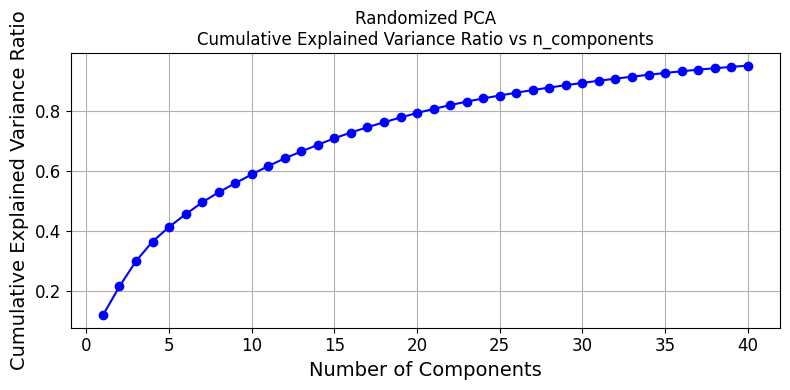

In [ ]:
# 1. Randomized PCA
print("Performing Randomized PCA...")
t0 = time()
# First find number of components needed for 95% variance
full_pca = PCA()
full_pca.fit(X_scaled)
n_components = np.argmax(np.cumsum(full_pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Components needed for 95% variance: {n_components}")

rpca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
X_rpca = rpca.fit_transform(X_scaled)
print(f"Randomized PCA done in {time() - t0:.3f}s")
print(f"Number of components selected: {rpca.n_components_}")
print(f"Total explained variance ratio: {sum(rpca.explained_variance_ratio_):.4f}\n")
plot_cumulative_variance(rpca, "Randomized PCA")

# Kernel PCA

Kernel PCA is a non-linear extension of PCA that uses the kernel trick to implicitly map data into a higher-dimensional feature space without explicitly computing the transformation. By applying PCA in this kernel space, it can capture non-linear relationships in the data that standard PCA would miss, making it effective for datasets with complex, non-linear patterns. While more powerful than standard PCA, it requires careful kernel selection (common choices include RBF, polynomial, or sigmoid) and can be computationally intensive for large datasets.

Performing Kernel PCA...
Kernel PCA done in 8.152s
Output shape: (1797, 40)



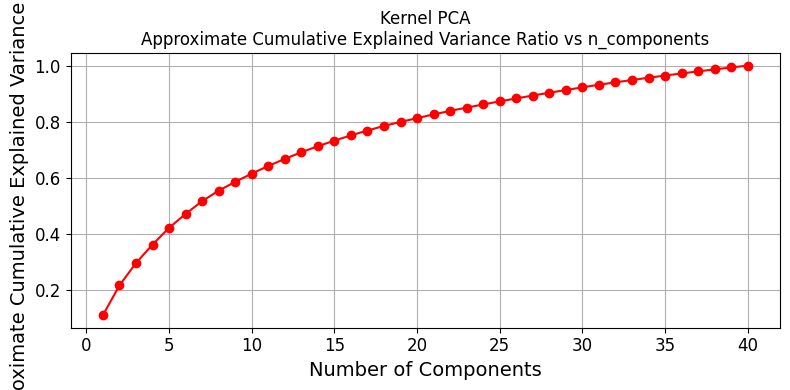

In [ ]:
# 2. Kernel PCA with fit_inverse_transform=True
print("Performing Kernel PCA...")
t0 = time()
kpca = KernelPCA(n_components=n_components, kernel='rbf', random_state=42,
                 fit_inverse_transform=True, gamma=None)  # gamma=None means 1/n_features
X_kpca = kpca.fit_transform(X_scaled)
print(f"Kernel PCA done in {time() - t0:.3f}s")
print(f"Output shape: {X_kpca.shape}\n")

# Calculate explained variance ratio for Kernel PCA
explained_var_kpca = np.var(X_kpca, axis=0)
explained_var_ratio_kpca = explained_var_kpca / np.sum(explained_var_kpca)
cumulative_var_ratio_kpca = np.cumsum(explained_var_ratio_kpca)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_var_ratio_kpca) + 1),
         cumulative_var_ratio_kpca,
         'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Approximate Cumulative Explained Variance Ratio')
plt.title('Kernel PCA\nApproximate Cumulative Explained Variance Ratio vs n_components')
plt.grid(True)
plt.tight_layout()
plt.show()

# Incremental PCA

Incremental PCA is a memory-efficient variant of PCA designed to handle large datasets by processing them in smaller batches rather than all at once. It incrementally updates the principal components as new data arrives, making it particularly useful when the entire dataset is too large to fit into memory or when dealing with streaming data.

Performing Incremental PCA...
Incremental PCA done in 0.172s
Number of components selected: 40
Total explained variance ratio: 0.9414


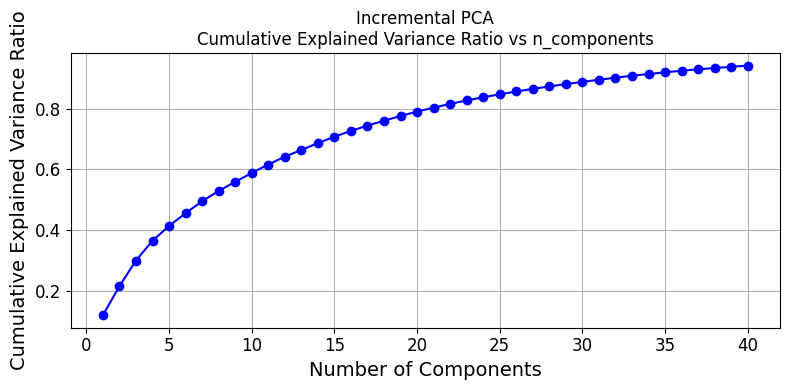

In [ ]:
# 3. Incremental PCA
print("Performing Incremental PCA...")
t0 = time()
batch_size = 50
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
X_ipca = ipca.fit_transform(X_scaled)
print(f"Incremental PCA done in {time() - t0:.3f}s")
print(f"Number of components selected: {ipca.n_components_}")
print(f"Total explained variance ratio: {sum(ipca.explained_variance_ratio_):.4f}")
plot_cumulative_variance(ipca, "Incremental PCA")

# Comparison of various PCA methods

In [ ]:
# Compare the reconstruction error for each method
def reconstruction_error(X_original, X_transformed, inverse_transform):
    X_reconstructed = inverse_transform(X_transformed)
    return np.mean(np.square(X_original - X_reconstructed))

print("\nReconstruction Errors:")
print(f"Randomized PCA: {reconstruction_error(X_scaled, X_rpca, rpca.inverse_transform):.6f}")
print(f"Kernel PCA: {reconstruction_error(X_scaled, X_kpca, kpca.inverse_transform):.6f}")
print(f"Incremental PCA: {reconstruction_error(X_scaled, X_ipca, ipca.inverse_transform):.6f}")


Reconstruction Errors:
Randomized PCA: 0.046944
Kernel PCA: 0.434374
Incremental PCA: 0.049446


# Locally Linear Embedding (LLE)

Locally Linear Embedding (LLE) is a nonlinear dimensionality reduction technique that preserves the local geometry of the data by reconstructing each point from its nearest neighbors. The method works by first finding the weights that best reconstruct each point from its neighbors in the original high-dimensional space, then using these same weights to find a low-dimensional embedding that preserves these local relationships.

Performing Standard LLE...
Standard LLE done in 0.292s
Reconstruction error: 0.0000



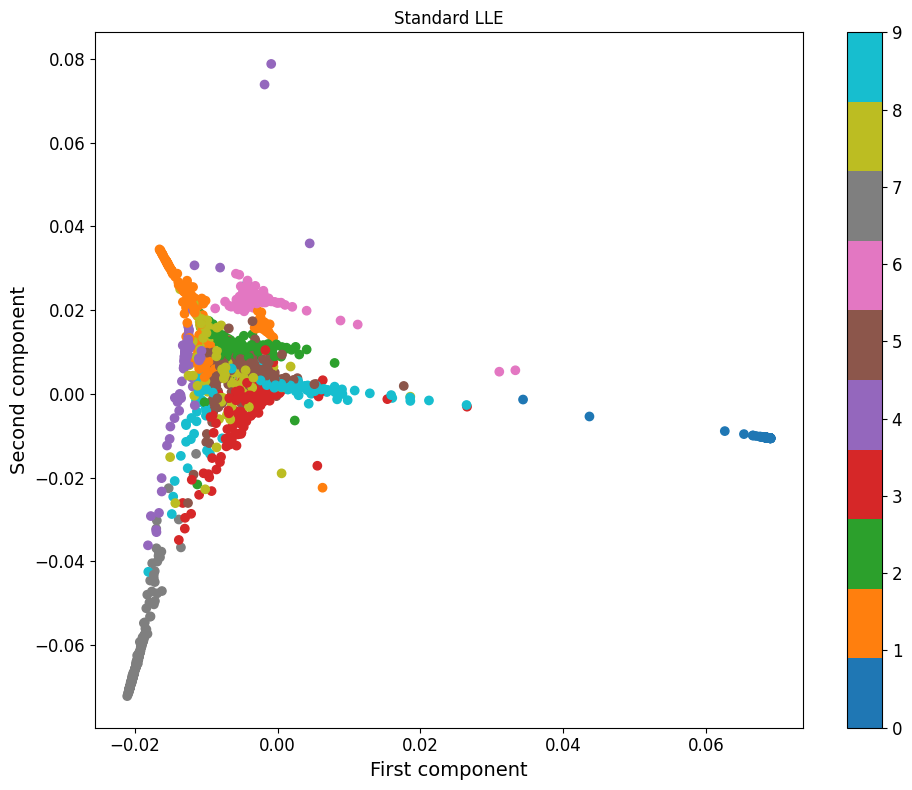

In [ ]:
# Standard LLE
# Load and preprocess the digits dataset
from sklearn.manifold import LocallyLinearEmbedding

digits = datasets.load_digits()
X = digits.data
y = digits.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot 2D embedding
def plot_embedding(X_transformed, y, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
                         c=y, cmap='tab10')
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.tight_layout()
    plt.show()

print("Performing Standard LLE...")
t0 = time()
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, method='standard',
                            random_state=42)
X_lle = lle.fit_transform(X_scaled)
print(f"Standard LLE done in {time() - t0:.3f}s")
print(f"Reconstruction error: {lle.reconstruction_error_:.4f}\n")
plot_embedding(X_lle, y, 'Standard LLE')

# TSNE interactive visualization

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that excels at visualizing high-dimensional data by converting similarities between data points into joint probabilities, focusing on preserving local structure. It works by minimizing the divergence between two distributions: one that measures pairwise similarities in the original high-dimensional space and another in the reduced low-dimensional space, using a t-distribution to avoid the "crowding problem".

In [ ]:
# TSNE interactive visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load and preprocess the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def run_tsne_and_plot(perplexity, learning_rate, n_iter):
    # Run t-SNE
    tsne = TSNE(n_components=2,
                perplexity=perplexity,
                learning_rate=learning_rate,
                n_iter=n_iter,
                random_state=42)

    X_tsne = tsne.fit_transform(X_scaled)

    # Create the plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                         c=y, cmap='tab10',
                         alpha=0.6)
    plt.colorbar(scatter)

    plt.title(f't-SNE visualization\nPerplexity: {perplexity}, '
              f'Learning Rate: {learning_rate}, Iterations: {n_iter}')
    plt.xlabel('First t-SNE dimension')
    plt.ylabel('Second t-SNE dimension')
    plt.tight_layout()
    plt.show()

    # Print KL divergence
    kl_divergence = tsne.kl_divergence_
    print(f"Final KL divergence: {kl_divergence:.4f}")

# Create interactive widgets
perplexity_slider = widgets.FloatSlider(
    value=30.0,
    min=5.0,
    max=50.0,
    step=1.0,
    description='Perplexity:',
    continuous_update=False
)

learning_rate_slider = widgets.FloatSlider(
    value=200.0,
    min=10.0,
    max=1000.0,
    step=10.0,
    description='Learning Rate:',
    continuous_update=False
)

n_iter_slider = widgets.IntSlider(
    value=1000,
    min=250,
    max=2000,
    step=50,
    description='Iterations:',
    continuous_update=False
)

def on_parameter_change(perplexity, learning_rate, n_iter):
    clear_output(wait=True)
    # Display current sliders
    display(perplexity_slider)
    display(learning_rate_slider)
    display(n_iter_slider)
    # Run t-SNE with current parameters
    run_tsne_and_plot(perplexity, learning_rate, n_iter)

# Link widgets to the visualization function
widgets.interactive(
    on_parameter_change,
    perplexity=perplexity_slider,
    learning_rate=learning_rate_slider,
    n_iter=n_iter_slider
)

interactive(children=(FloatSlider(value=30.0, continuous_update=False, description='Perplexity:', max=50.0, mi…

# ISOMAP

ISOMAP (Isometric Feature Mapping) is a nonlinear dimensionality reduction technique that extends MDS by replacing Euclidean distances with geodesic distances computed along the manifold of the data. It estimates these geodesic distances by constructing a neighborhood graph and finding shortest paths between points, making it particularly effective at discovering the underlying geometric structure of manifold data.

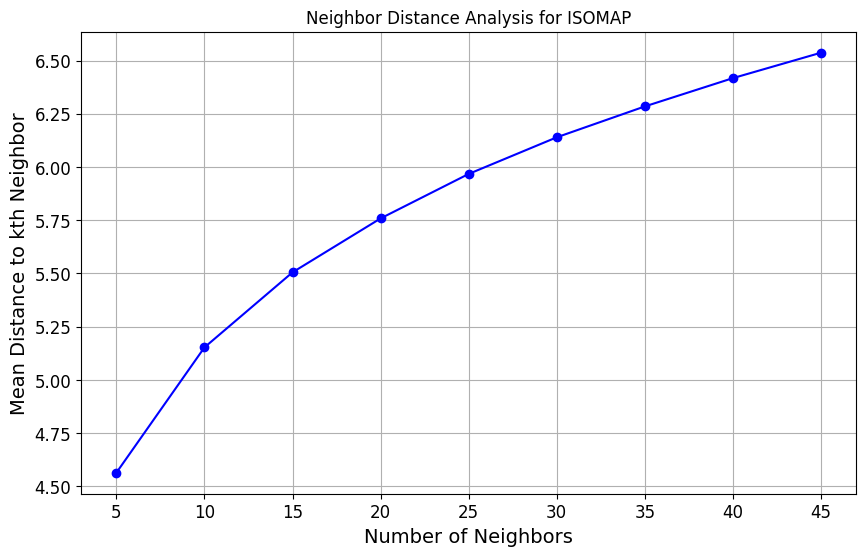

Estimated optimal number of neighbors: 45

Performing basic ISOMAP...
Basic ISOMAP done in 4.020s
Reconstruction error: 49.1807


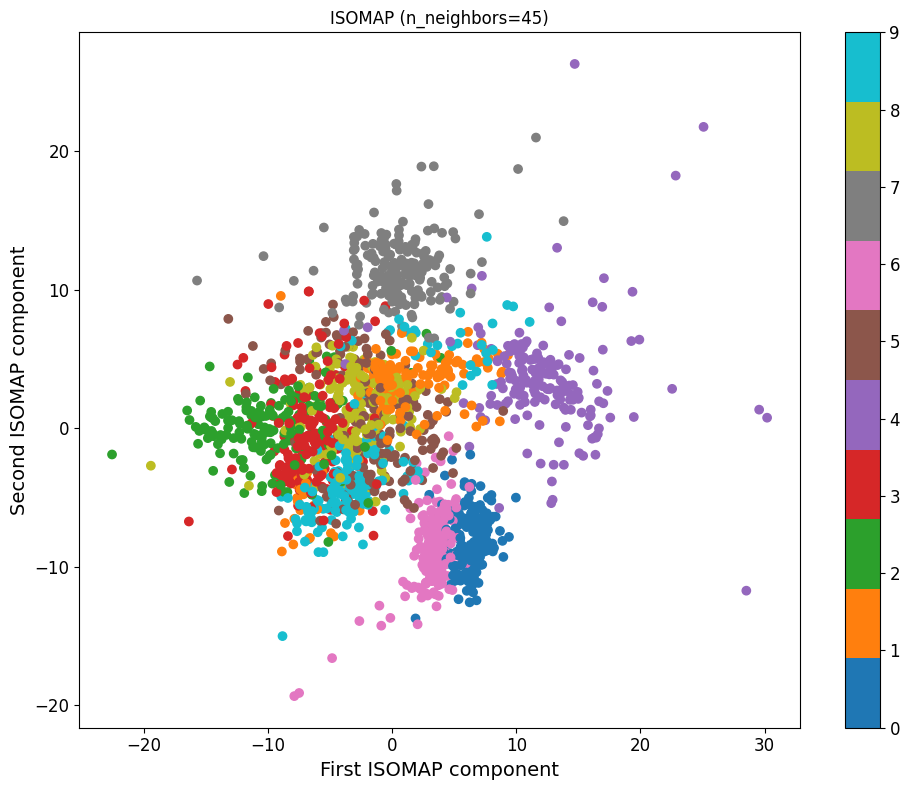

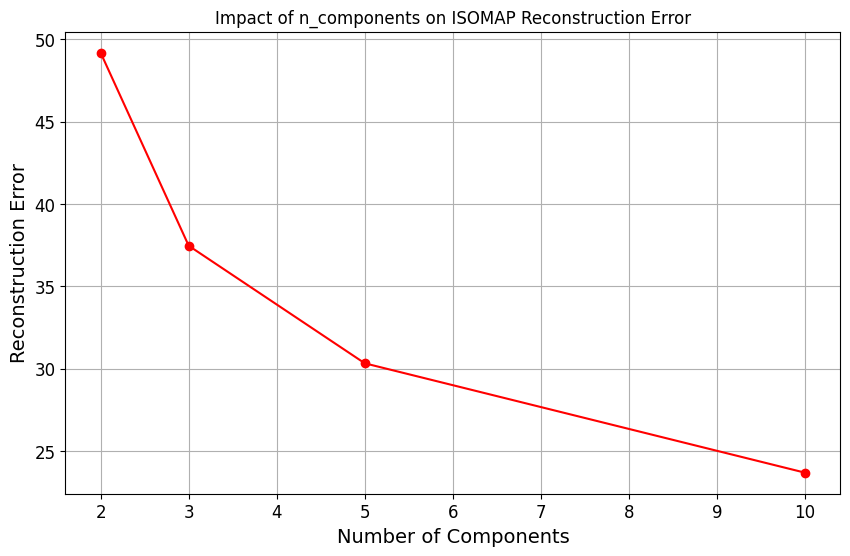

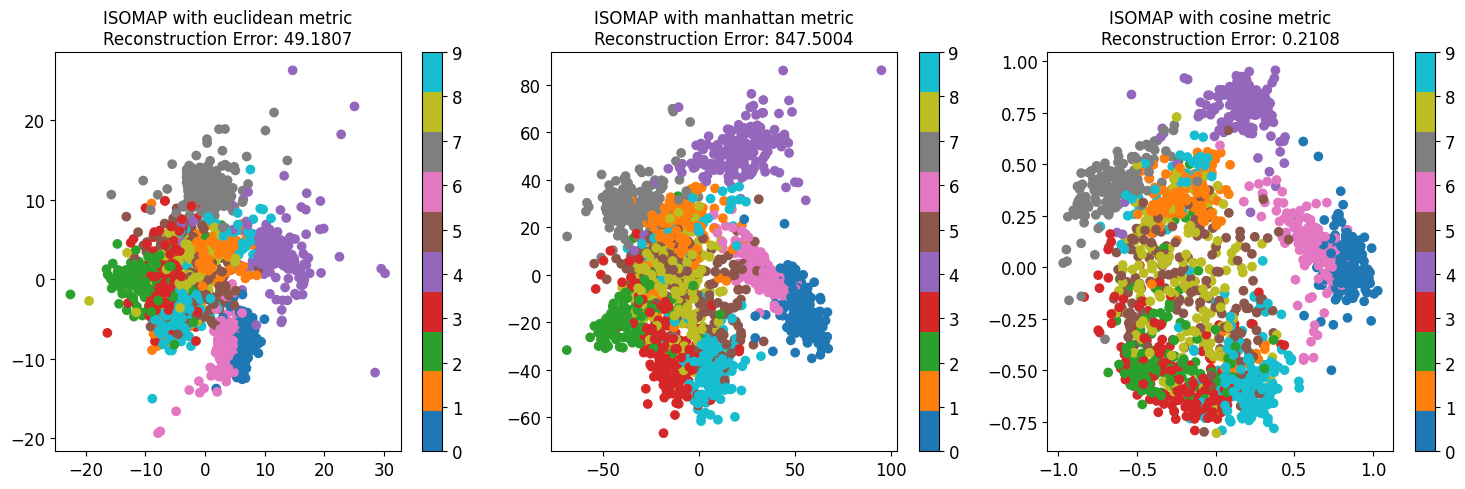


Performing ISOMAP using pipeline...
Pipeline ISOMAP done in 3.324s


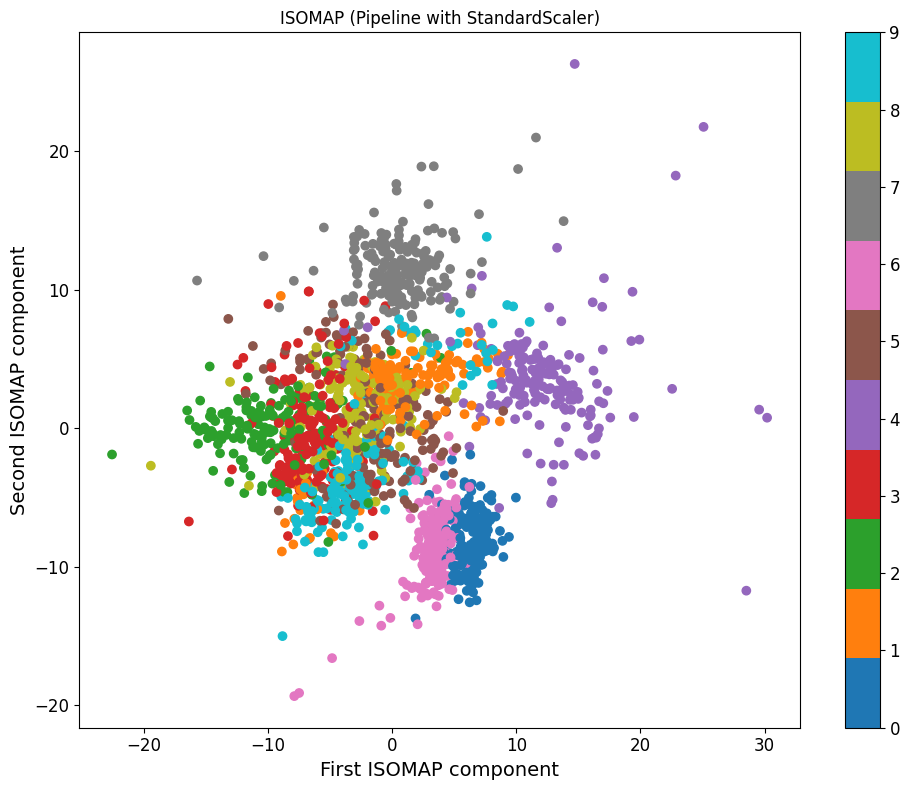


ISOMAP Analysis Summary:
--------------------------------------------------
Optimal number of neighbors: 45

Reconstruction Errors by Distance Metric:
euclidean: 49.1807
manhattan: 847.5004
cosine: 0.2108

Reconstruction Errors by Number of Components:
2 components: 49.1807
3 components: 37.4597
5 components: 30.3191
10 components: 23.6759


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from time import time
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline

# Load and preprocess the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot 2D embedding
def plot_embedding(X_transformed, y, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
                         c=y, cmap='tab10')
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('First ISOMAP component')
    plt.ylabel('Second ISOMAP component')
    plt.tight_layout()
    plt.show()

# Function to estimate optimal n_neighbors
def estimate_optimal_neighbors(X, k_range):
    reconstruction_errors = []

    for k in k_range:
        # Fit nearest neighbors
        nbrs = NearestNeighbors(n_neighbors=k).fit(X)
        distances, _ = nbrs.kneighbors(X)

        # Calculate reconstruction error as mean distance to kth neighbor
        reconstruction_error = np.mean(distances[:, -1])
        reconstruction_errors.append(reconstruction_error)

    # Plot reconstruction errors
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, reconstruction_errors, 'bo-')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Mean Distance to kth Neighbor')
    plt.title('Neighbor Distance Analysis for ISOMAP')
    plt.grid(True)
    plt.show()

    # Return optimal k (elbow point - simple approximation)
    diffs = np.diff(reconstruction_errors)
    optimal_k = k_range[np.argmin(np.abs(diffs)) + 1]
    return optimal_k

# Estimate optimal number of neighbors
k_range = range(5, 50, 5)
optimal_k = estimate_optimal_neighbors(X_scaled, k_range)
print(f"Estimated optimal number of neighbors: {optimal_k}")

# 1. Basic ISOMAP with optimal neighbors
print("\nPerforming basic ISOMAP...")
t0 = time()
isomap = Isomap(n_components=2, n_neighbors=optimal_k)
X_isomap = isomap.fit_transform(X_scaled)
print(f"Basic ISOMAP done in {time() - t0:.3f}s")
print(f"Reconstruction error: {isomap.reconstruction_error():.4f}")
plot_embedding(X_isomap, y, f'ISOMAP (n_neighbors={optimal_k})')

# 2. Compare different numbers of components
n_components_range = [2, 3, 5, 10]
reconstruction_errors = []

for n_comp in n_components_range:
    isomap = Isomap(n_components=n_comp, n_neighbors=optimal_k)
    isomap.fit_transform(X_scaled)
    reconstruction_errors.append(isomap.reconstruction_error())

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, reconstruction_errors, 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Impact of n_components on ISOMAP Reconstruction Error')
plt.grid(True)
plt.show()

# 3. Compare different metrics
metrics = ['euclidean', 'manhattan', 'cosine']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    isomap = Isomap(n_components=2, n_neighbors=optimal_k, metric=metric)
    X_isomap = isomap.fit_transform(X_scaled)
    plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='tab10')
    plt.title(f'ISOMAP with {metric} metric\nReconstruction Error: {isomap.reconstruction_error():.4f}')
    plt.colorbar()

plt.tight_layout()
plt.show()

# 4. Create a pipeline with preprocessing and ISOMAP
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('isomap', Isomap(n_components=2, n_neighbors=optimal_k))
])

# Fit and transform using pipeline
print("\nPerforming ISOMAP using pipeline...")
t0 = time()
X_isomap_pipeline = pipeline.fit_transform(X)
print(f"Pipeline ISOMAP done in {time() - t0:.3f}s")
plot_embedding(X_isomap_pipeline, y, 'ISOMAP (Pipeline with StandardScaler)')

# Print summary of findings
print("\nISOMAP Analysis Summary:")
print("-" * 50)
print(f"Optimal number of neighbors: {optimal_k}")
print("\nReconstruction Errors by Distance Metric:")
for metric in metrics:
    isomap = Isomap(n_components=2, n_neighbors=optimal_k, metric=metric)
    X_isomap = isomap.fit_transform(X_scaled)
    print(f"{metric}: {isomap.reconstruction_error():.4f}")

print("\nReconstruction Errors by Number of Components:")
for n_comp, error in zip(n_components_range, reconstruction_errors):
    print(f"{n_comp} components: {error:.4f}")

In [ ]:
!pip install umap-learn ipywidgets scikit-learn numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.4 MB/s eta 0:00:00


# UMAP

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique that constructs a high-dimensional graph representation of data and then optimizes a low-dimensional graph to be as structurally similar as possible. It generally performs faster than t-SNE while better preserving both local and global structure of the data, making it particularly effective for visualization and general dimensionality reduction tasks.

Button(description='Analyze Parameter Sensitivity', style=ButtonStyle())

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr

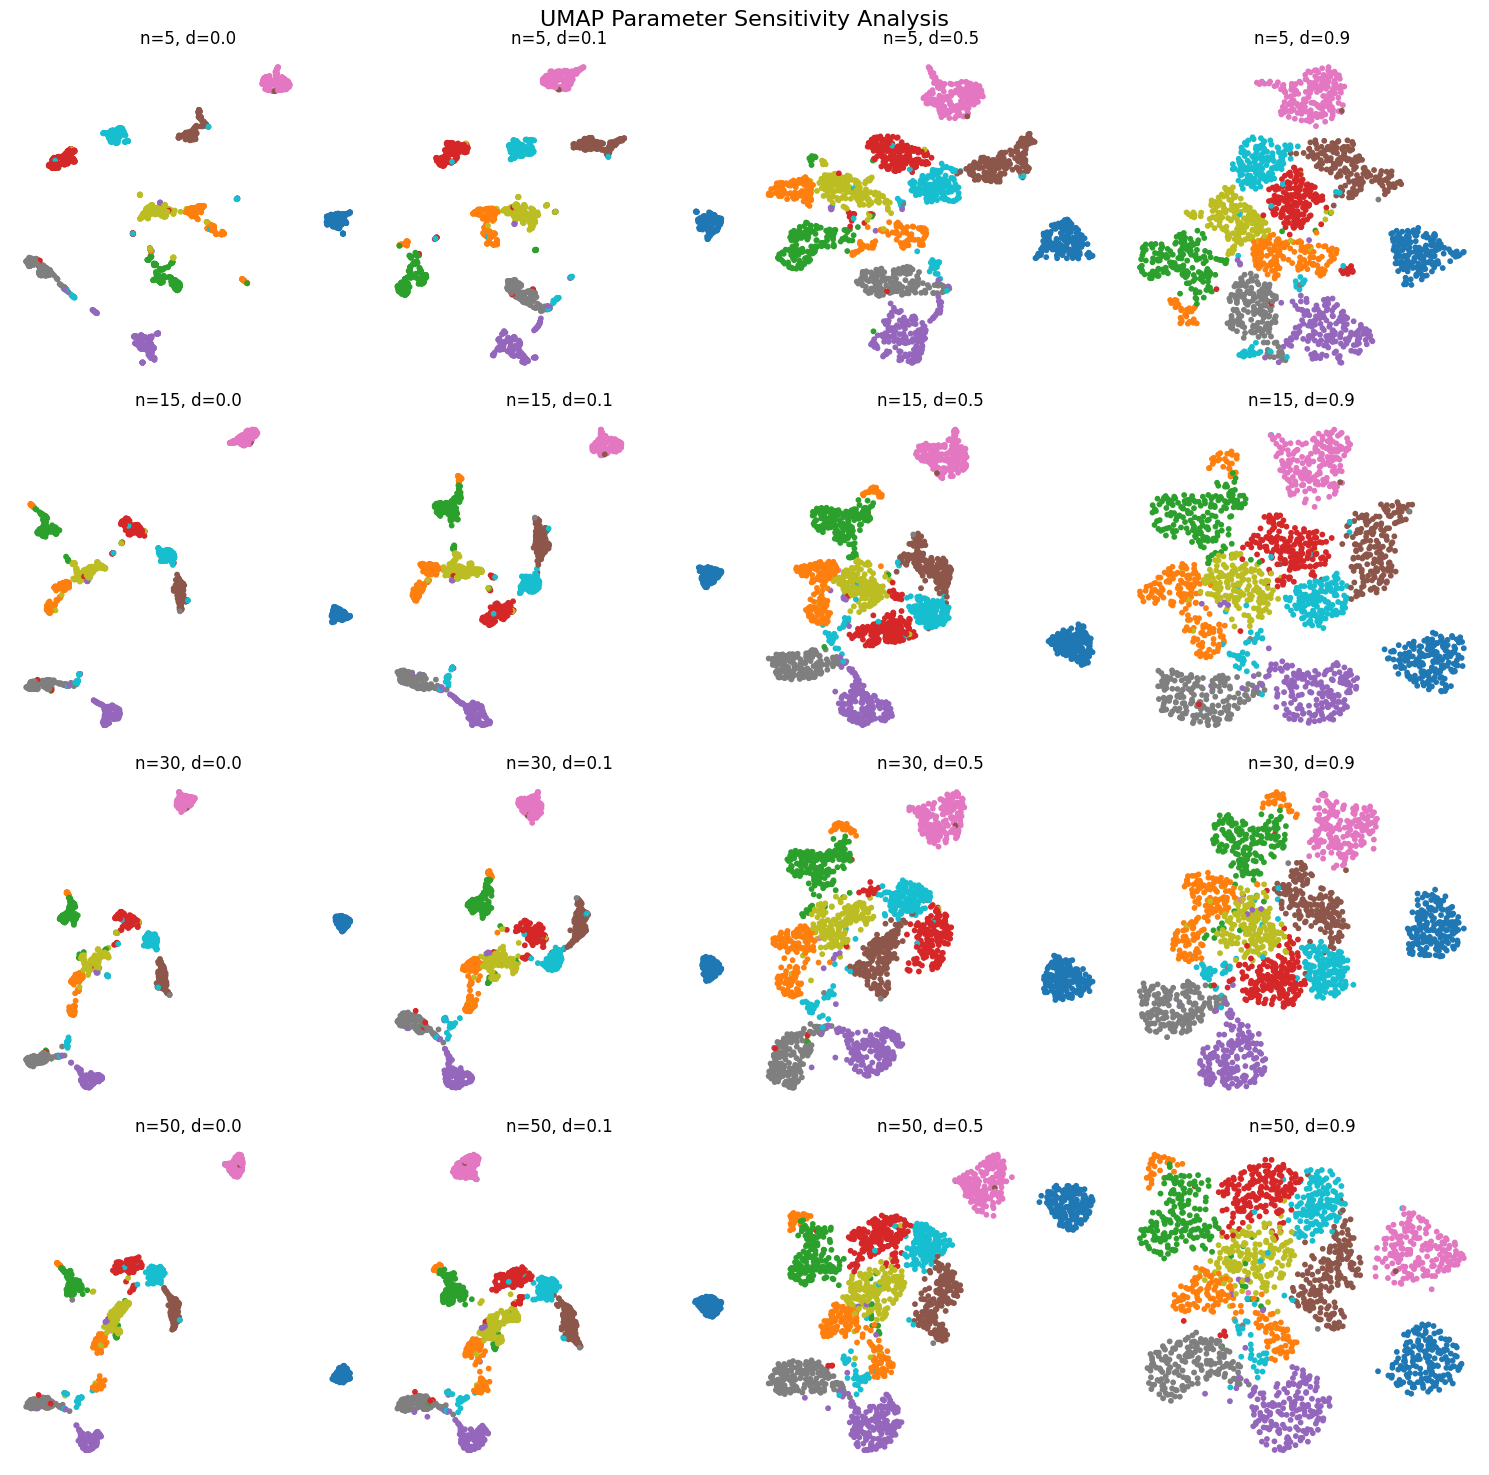

In [ ]:
# UMAP Interactive visualization

import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import time

# Load and preprocess the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def run_umap_and_plot(n_neighbors, min_dist, metric, n_components):
    # Run UMAP
    t0 = time.time()
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric=metric,
        n_components=n_components,
        random_state=42
    )

    embedding = reducer.fit_transform(X_scaled)

    # Create visualization
    plt.figure(figsize=(12, 8))

    if n_components == 2:
        # 2D plot
        scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                            c=y, cmap='tab10', alpha=0.6)
        plt.colorbar(scatter)
        plt.xlabel('UMAP 1')
        plt.ylabel('UMAP 2')

    elif n_components == 3:
        # 3D plot
        ax = plt.axes(projection='3d')
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
                           c=y, cmap='tab10', alpha=0.6)
        plt.colorbar(scatter)
        ax.set_xlabel('UMAP 1')
        ax.set_ylabel('UMAP 2')
        ax.set_zlabel('UMAP 3')

    plt.title(f'UMAP projection\nn_neighbors: {n_neighbors}, '
              f'min_dist: {min_dist:.2f}, metric: {metric}')

    plt.tight_layout()
    plt.show()

    print(f"UMAP completed in {time.time() - t0:.2f} seconds")
    print("\nDigit classes are represented by different colors (0-9)")

# Create interactive widgets
n_neighbors_slider = widgets.IntSlider(
    value=15,
    min=2,
    max=100,
    step=1,
    description='n_neighbors:',
    continuous_update=False
)

min_dist_slider = widgets.FloatSlider(
    value=0.1,
    min=0.0,
    max=0.99,
    step=0.01,
    description='min_dist:',
    continuous_update=False
)

metric_dropdown = widgets.Dropdown(
    options=['euclidean', 'manhattan', 'cosine', 'correlation'],
    value='euclidean',
    description='Metric:',
)

n_components_dropdown = widgets.Dropdown(
    options=[2, 3],
    value=2,
    description='Components:',
)

def on_parameter_change(n_neighbors, min_dist, metric, n_components):
    clear_output(wait=True)
    # Display current widgets
    display(n_neighbors_slider)
    display(min_dist_slider)
    display(metric_dropdown)
    display(n_components_dropdown)
    # Run UMAP with current parameters
    run_umap_and_plot(n_neighbors, min_dist, metric, n_components)

# Create interactive visualization
widgets.interactive(
    on_parameter_change,
    n_neighbors=n_neighbors_slider,
    min_dist=min_dist_slider,
    metric=metric_dropdown,
    n_components=n_components_dropdown
)

# Function to analyze parameter sensitivity
def analyze_parameter_sensitivity():
    n_neighbors_range = [5, 15, 30, 50]
    min_dist_range = [0.0, 0.1, 0.5, 0.9]

    fig, axes = plt.subplots(len(n_neighbors_range), len(min_dist_range),
                            figsize=(15, 15))
    fig.suptitle('UMAP Parameter Sensitivity Analysis', fontsize=16)

    for i, n_neighbors in enumerate(n_neighbors_range):
        for j, min_dist in enumerate(min_dist_range):
            reducer = umap.UMAP(
                n_neighbors=n_neighbors,
                min_dist=min_dist,
                random_state=42
            )
            embedding = reducer.fit_transform(X_scaled)

            axes[i, j].scatter(embedding[:, 0], embedding[:, 1],
                             c=y, cmap='tab10', s=10)
            axes[i, j].set_title(f'n={n_neighbors}, d={min_dist}')
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Button to trigger parameter sensitivity analysis
analyze_button = widgets.Button(description='Analyze Parameter Sensitivity')
display(analyze_button)

def on_analyze_button_clicked(b):
    analyze_parameter_sensitivity()

analyze_button.on_click(on_analyze_button_clicked)

# MDS (Multi dimensional scaling)

Multidimensional Scaling (MDS) is a technique that aims to preserve the pairwise distances between points when reducing data to a lower-dimensional space, making it useful for visualizing similarity or dissimilarity data. It works by minimizing a stress function that measures the difference between the distances in the original high-dimensional space and the distances in the reduced low-dimensional space.

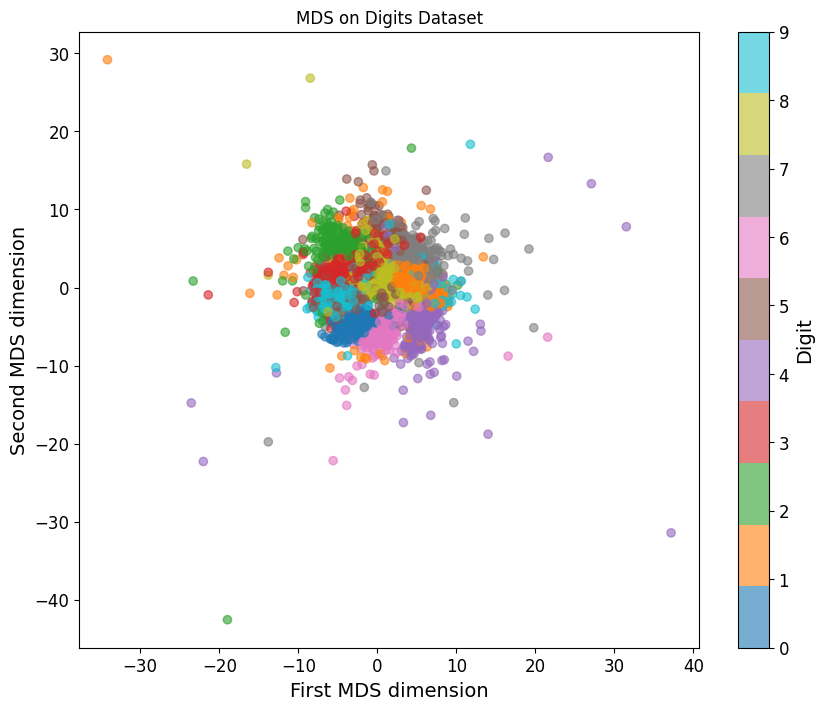

Stress: 17041858.30


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1],
                     c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Digit')
plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('MDS on Digits Dataset')
plt.show()

# Print stress (badness of fit)
print(f"Stress: {mds.stress_:.2f}")

# Factor analysis using sklearn


Factor Analysis is a statistical method that explains observed variables in terms of underlying, unobserved latent factors by modeling the correlations between variables as linear combinations of these hidden factors. Unlike PCA which seeks directions of maximum variance, Factor Analysis assumes a probabilistic model where observed variables are generated by a smaller set of unobserved factors plus some noise or error term.




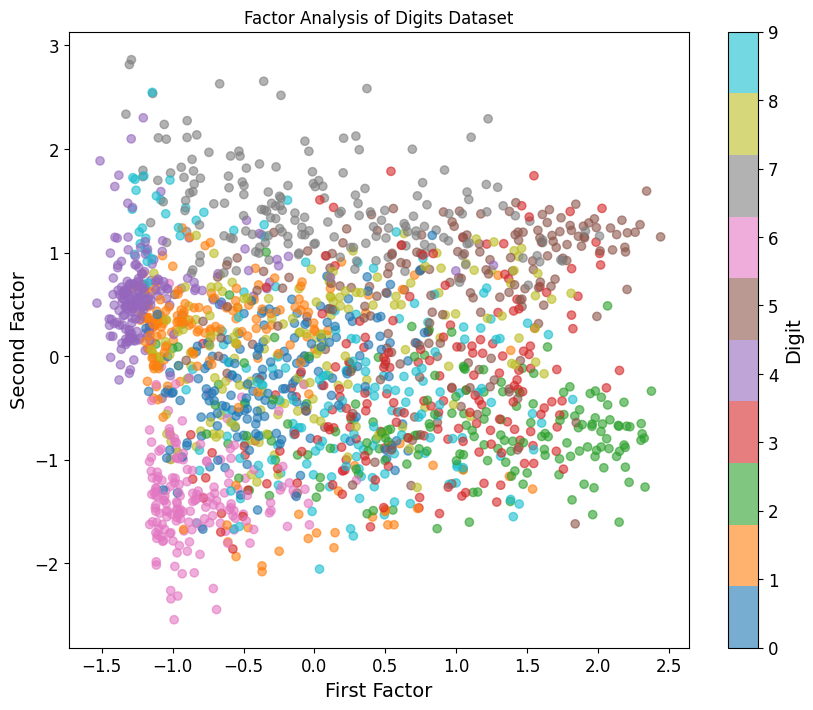

In [ ]:
# Factor analysis using sklearn

import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
X_transformed = fa.fit_transform(X_scaled)

# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
                     c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Digit')
plt.xlabel('First Factor')
plt.ylabel('Second Factor')
plt.title('Factor Analysis of Digits Dataset')
plt.show()


# AutoEncoders

Autoencoders are neural networks that learn to compress data into a lower-dimensional representation (encoding) and then reconstruct it back to the original dimensions (decoding), with the key idea being that the encoded representation captures the most important features of the data. The network is trained by minimizing the reconstruction error between the input and output, forcing it to learn an efficient internal representation in the bottleneck layer, making it useful for dimensionality reduction, feature learning, and data compression.

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 442ms/step - loss: 1.2236 - val_loss: 1.0614
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2452 - val_loss: 1.0582
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1972 - val_loss: 1.0552
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2285 - val_loss: 1.0509
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2655 - val_loss: 1.0443
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1992 - val_loss: 1.0335
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1822 - val_loss: 1.0170
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1697 - val_loss: 0.9936
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1846 - val_loss: 0.9641
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1596 - val_loss: 0.9307
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0621 - val_loss: 0.8971
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.1069 - val_loss: 0.8674
Epoch 13

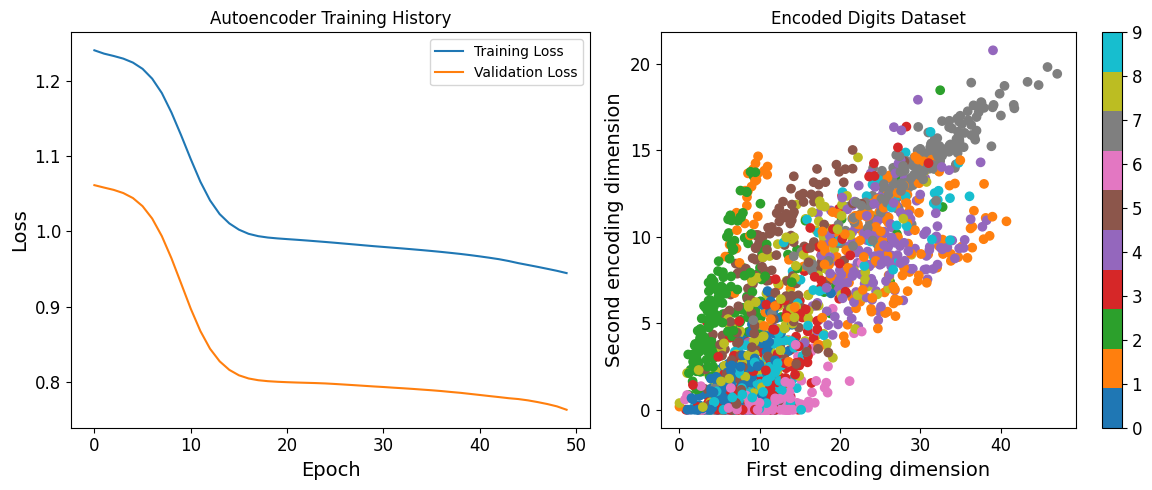

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


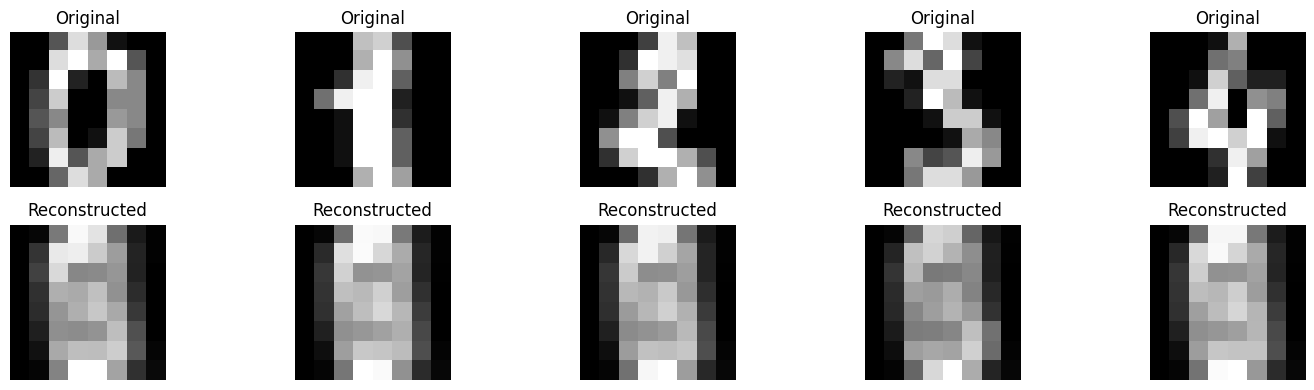

In [ ]:
# Auto encoders
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load and preprocess data
digits = load_digits()
X = digits.data
y = digits.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define autoencoder architecture
input_dim = X_scaled.shape[1]  # 64 for digits dataset
encoding_dim = 2  # Compressed representation size

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Create and compile autoencoder
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
history = autoencoder.fit(X_scaled, X_scaled,
                         epochs=50,
                         batch_size=256,
                         shuffle=True,
                         validation_split=0.2,
                         verbose=1)

# Encode data
encoded_data = encoder.predict(X_scaled)

# Plot results
plt.figure(figsize=(12, 5))

# Plot training history
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot encoded data
plt.subplot(1, 2, 2)
scatter = plt.scatter(encoded_data[:, 0], encoded_data[:, 1],
                     c=y, cmap='tab10')
plt.colorbar(scatter)
plt.title('Encoded Digits Dataset')
plt.xlabel('First encoding dimension')
plt.ylabel('Second encoding dimension')

plt.tight_layout()
plt.show()

# Visualize original vs reconstructed digits
n_samples = 5
decoded_data = autoencoder.predict(X_scaled)

plt.figure(figsize=(15, 4))
for i in range(n_samples):
    # Original
    ax = plt.subplot(2, n_samples, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n_samples, i + n_samples + 1)
    plt.imshow(scaler.inverse_transform(decoded_data)[i].reshape(8, 8),
              cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()